In [3]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

# Load the data

In [4]:
import datetime
from helpers import *

height, weight, gender = load_data(sub_sample=False, add_outlier=False)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

In [5]:
y.shape, tx.shape

((10000,), (10000, 2))

# Computing the Cost Function
Fill in the the `compute_cost` function below:

Mean Suqared Error:

L(w) = MAE(w) = 1/N sum |yn - f(xn)|

f = w0+w1xn1

In [21]:
def compute_loss(y, tx, w):
    """Calculate the loss.

    You can calculate the loss using mse or mae.
    """
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute loss by MSE / MAE
    # ***************************************************
    fxn = np.dot(tx,w) 
    e = y - fxn
    #return np.mean(e**2)
    return np.mean(abs(e))
    # raise NotImplementedError

In [23]:
compute_loss(y,tx,[1,2])

72.293922002105177

# Grid Search

Fill in the function `grid_search()` below:

In [25]:
np.zeros((3,5))

array([[ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.]])

In [32]:
def grid_search(y, tx, w0, w1):
    """Algorithm for grid search."""
    losses = np.zeros((len(w0), len(w1)))
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute loss for each combination of w0 and w1.
    # ***************************************************
    for i in range(len(w0)):
        for j in range(len(w1)):
            losses[i][j] = compute_loss(y,tx,[w0[i],w1[j]])
    # raise NotImplementedError
    return losses

Let us play with the grid search demo now!

Grid Search: loss*=7.5885150157040915, w0*=66.66666666666669, w1*=16.666666666666686, execution time=0.040 seconds


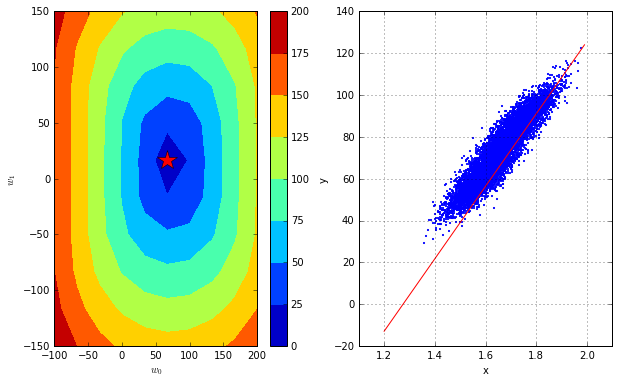

In [33]:
from grid_search import generate_w, get_best_parameters
from plots import grid_visualization
import datetime

# Generate the grid of parameters to be swept
grid_w0, grid_w1 = generate_w(num_intervals=10)

# Start the grid search
start_time = datetime.datetime.now()
grid_losses = grid_search(y, tx, grid_w0, grid_w1)

# Select the best combinaison
loss_star, w0_star, w1_star = get_best_parameters(grid_w0, grid_w1, grid_losses)
end_time = datetime.datetime.now()
execution_time = (end_time - start_time).total_seconds()

# Print the results
print("Grid Search: loss*={l}, w0*={w0}, w1*={w1}, execution time={t:.3f} seconds".format(
      l=loss_star, w0=w0_star, w1=w1_star, t=execution_time))

# Plot the results
fig = grid_visualization(grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight)
fig.set_size_inches(10.0,6.0)
fig.savefig("grid_plot")  # Optional saving

# Gradient Descent

Again, please fill in the functions `compute_gradient` below:

In [50]:
def compute_gradient(y, tx, w):
    """Compute the gradient."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute gradient and loss
    # ***************************************************
    fxn = np.dot(tx,w) 
    e = y - fxn # vector with N values
    N = len(y)
    gradient = -1/N * np.dot(np.transpose(tx),e)
    return gradient

In [54]:
compute_gradient(y,tx,[50,10])

array([-23.293922  ,  -3.47971243])

Please fill in the functions `gradient_descent` below:

In [63]:
def gradient_descent(y, tx, initial_w, max_iters, gamma): 
    """Gradient descent algorithm."""
    # Define parameters to store w and loss
    ws = [initial_w] # w_initial = [0.0,0.0] 2vector
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: compute gradient and loss
        # ***************************************************
        loss = compute_loss(y,tx,w)
        gradient = compute_gradient(y,tx,w)
        
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: update w by gradient
        # ***************************************************
        w = w - gamma * gradient

        # store w and loss
        ws.append(np.copy(w))
        losses.append(loss)
        print("Gradient Descent({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))

    return losses, ws

Test your gradient descent function through gradient descent demo shown below:

In [81]:
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.1

# Initialization
w_initial = np.array([-1000, 1000])

# Start gradient descent.
start_time = datetime.datetime.now()
gradient_losses, gradient_ws = gradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("Gradient Descent: execution time={t:.3f} seconds".format(t=exection_time))

Gradient Descent(0/49): loss=1210.7945490694617, w0=-892.6706077997898, w1=901.3479712434981
Gradient Descent(1/49): loss=1089.7320335556349, w0=-796.0741548196002, w1=812.561145362647
Gradient Descent(2/49): loss=980.7757695931908, w0=-709.1373471374294, w1=732.6530020698813
Gradient Descent(3/49): loss=882.7154432536324, w0=-630.8942202234758, w1=660.7356731063917
Gradient Descent(4/49): loss=794.461467797371, w0=-560.4754060009178, w1=596.0100770392514
Gradient Descent(5/49): loss=715.0330363875212, w0=-497.09847320061544, w1=537.757040578825
Gradient Descent(6/49): loss=643.5474481186561, w0=-440.05923368034337, w1=485.3293077644414
Gradient Descent(7/49): loss=579.2105864349213, w0=-388.7239181120987, w1=438.1443482314959
Gradient Descent(8/49): loss=521.3077048385679, w0=-342.52213410067833, w1=395.6778846518452
Gradient Descent(9/49): loss=469.1954759759038, w0=-300.94052849039974, w1=357.4580674301595
Gradient Descent(10/49): loss=422.29475065419535, w0=-263.51708344114905, w1=

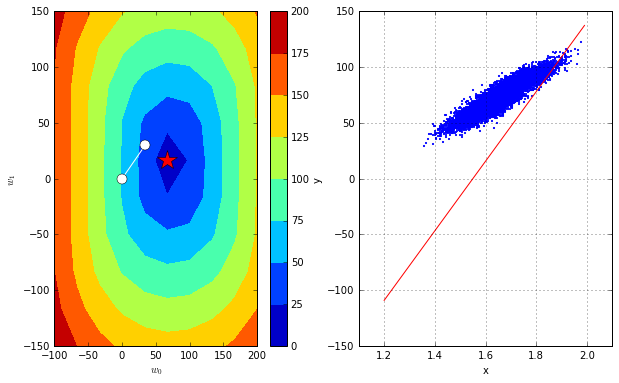

In [79]:
# Time Visualization
from ipywidgets import IntSlider, interact
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gradient_losses, gradient_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))

# Stochastic gradient descent

In [120]:
def compute_stoch_gradient(y, tx, w):
    """Compute a stochastic gradient for batch data."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: implement stochastic gradient computation.It's same as the gradient descent. 
    # The only difference is later how to choose which gradient.
    # ***************************************************
    fxn = np.dot(tx,w) 
    e = y - fxn # vector with N values
    N = len(y)
    gradient = -1/N * np.dot(np.transpose(tx),e)
    return gradient

def stochastic_gradient_descent(y, tx, initial_w, batch_size, max_epochs, gamma):
    """Stochastic gradient descent algorithm."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: implement stochastic gradient descent.
    # ***************************************************
    ws = [initial_w]
    losses = [compute_loss(y,tx,initial_w)]
    w = initial_w
    
    for minibatch_y, minibatch_tx in batch_iter(y, tx, batch_size):
        gradient = compute_stoch_gradient(minibatch_y, minibatch_tx, w)
        w = w - gamma * gradient
        ws.append(np.copy(w))
        loss = compute_loss(y,tx,w)
        losses.append(loss)
    print(ws)
    print(losses)
            
    return losses, ws

In [121]:
for minibatch_y, minibatch_tx in batch_iter(y, tx, 1):
    # print(minibatch_y) # minibatch_y is an array with 32 elements of random things from y
    print(minibatch_y, minibatch_tx) # minibatch_x is an array of 32 tuples of tx

[ 90.18974297] [[ 1.          1.14213913]]


In [122]:
# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.4
batch_size = 1

# Initialization
w_initial = np.array([0.0, 0.0])

# Start SGD.
start_time = datetime.datetime.now()
gradient_losses, gradient_ws = stochastic_gradient_descent(
    y, tx, w_initial, batch_size, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SGD: execution time={t:.3f} seconds".format(t=exection_time))

[array([ 0.,  0.]), array([ 34.17369227,  29.99836226])]
[73.293922002105177, 39.236634899609754]
SGD: execution time=0.007 seconds


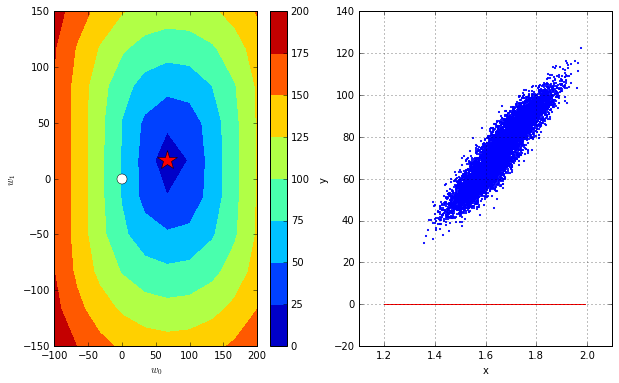

In [123]:
# Time Visualization
from ipywidgets import IntSlider, interact
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gradient_losses, gradient_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))